## kNN для бинарных features


In [1]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=110,
    n_features=2,n_informative =2, n_redundant = 0, n_classes = 2, random_state = 6)

In [3]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

In [5]:
display(X,y)

array([[-1.71435607,  1.05793305],
       [ 1.22308043, -2.2635163 ],
       [-0.74339553, -0.82836749],
       [-3.10114999,  0.55737705],
       [-1.25272785, -1.99962916],
       [ 1.295549  , -0.90585939],
       [-0.39121512,  1.30843756],
       [-2.29436606, -0.32114685],
       [-0.37326143, -1.5106069 ],
       [ 0.84350362,  0.03804169],
       [-1.23337772,  0.62869299],
       [-0.51595847, -1.69033762],
       [ 0.11293492, -1.46417755],
       [ 0.39978471, -1.3120226 ],
       [-2.49684085, -0.0139064 ],
       [ 1.19899006,  1.27323302],
       [-1.84733371,  1.17918884],
       [-1.68009315,  0.94130391],
       [ 2.6400623 , -0.13810078],
       [-1.8453037 ,  0.96321745],
       [-0.71170663,  0.71554382],
       [-0.02934338, -1.59054511],
       [ 1.23158511,  1.36757795],
       [ 1.72196418, -0.7425116 ],
       [ 1.5719743 , -3.17595646],
       [ 0.14132289, -1.44743003],
       [ 1.80872881, -0.63583078],
       [ 1.79510491, -0.69260501],
       [ 0.07462334,

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

## Отложенная выборка

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size=10)

In [8]:
X_train.shape

(100, 2)

In [9]:
X_test.shape

(10, 2)

In [10]:
X.shape

(110, 2)

## Отрисуем

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

In [15]:
from matplotlib.colors import ListedColormap

In [16]:
cmap_bold = ["darkorange", "darkblue"]

In [22]:
X_train[0:4, 0]

array([ 1.17920531, -0.40739519,  0.43640371, -1.73036196])

In [23]:
X_train

array([[ 1.17920531, -0.95482454],
       [-0.40739519, -1.42213182],
       [ 0.43640371,  0.59084543],
       [-1.73036196, -0.17567094],
       [ 1.22308043, -2.2635163 ],
       [-1.23337772,  0.62869299],
       [ 0.40798076, -2.16809281],
       [ 0.80976032, -1.12345802],
       [ 0.22402532,  1.70119761],
       [-0.52147411, -1.29269155],
       [-1.8453037 ,  0.96321745],
       [-2.49684085, -0.0139064 ],
       [ 1.03098019,  1.42444297],
       [ 1.10337767,  1.54338503],
       [ 1.24406513, -0.13074864],
       [-0.68161073,  1.14872781],
       [-3.10114999,  0.55737705],
       [ 1.08127939, -0.76460936],
       [-0.70433282, -0.63475682],
       [ 2.61750165,  2.21818536],
       [-1.90408022,  0.78778037],
       [ 4.58019646,  0.59593671],
       [ 0.61407512, -2.55871026],
       [-0.13483089,  0.36769071],
       [-0.47732004,  0.97301565],
       [-0.11045328, -1.70842715],
       [-1.58212305,  0.2779565 ],
       [-1.74881986,  0.94640166],
       [ 1.28048571,

<Axes: >

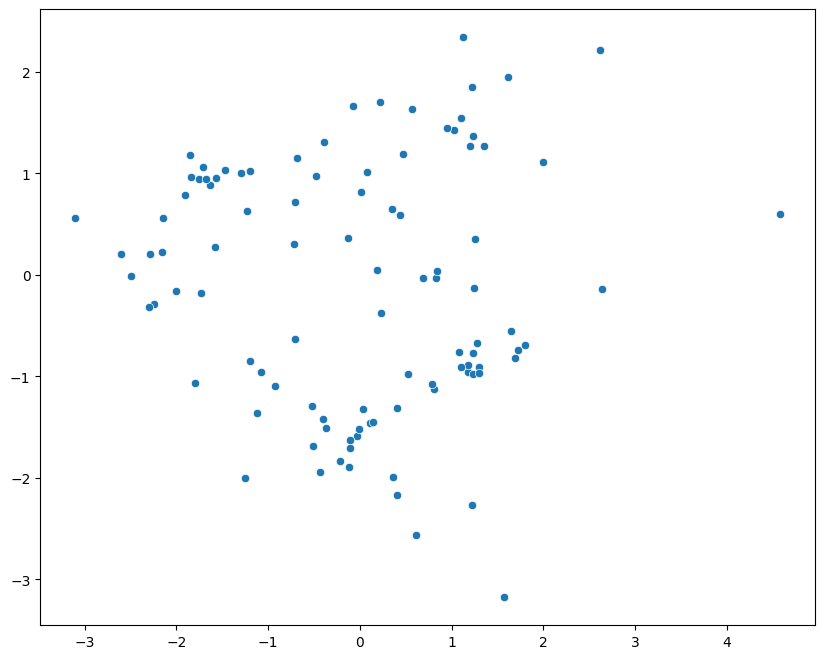

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot( x = X_train[ : ,0], y = X_train[ : ,1])

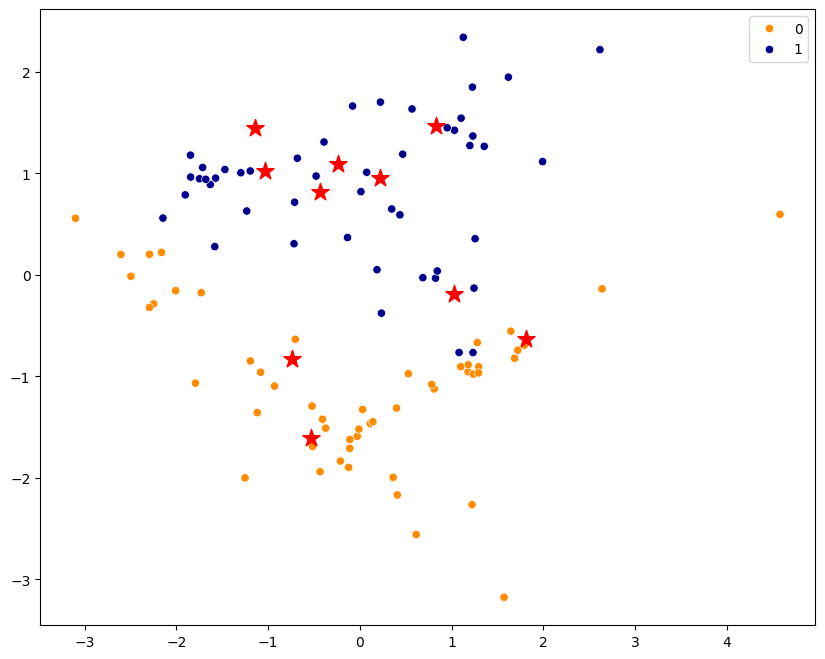

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot( x = X_train[ : ,0], y = X_train[ : ,1], hue = y_train, palette = cmap_bold)
plt.scatter( X_test[ : ,0], X_test[ : ,1], color = 'red', marker = '*', s = 170)

## Модель kNN из skLearn

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
n_neighbors = 3
model = KNeighborsClassifier( n_neighbors = n_neighbors)

In [36]:
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

# Модель просто сохранила выборку

In [37]:
pred_test = model.predict(X_test)

In [38]:
pred_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [39]:
display(pred_test,y_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [41]:
model.score(X_train, y_train)

0.98

## Для задачи классификации сделали. Теперь задача регрессии.

In [42]:
from sklearn.datasets import make_regression

In [43]:
X, y = make_regression( n_samples = 110, n_features = 2 , n_informative =2, random_state = 6)

In [44]:
display(X,y)

array([[ 0.78263039, -0.49341854],
       [-0.18765745, -1.4863921 ],
       [ 1.63929108, -0.4298936 ],
       [ 0.35480861,  1.81259031],
       [-2.12647459,  0.75144883],
       [ 1.56448966,  0.71270509],
       [ 0.65725757, -0.47237563],
       [ 0.07409773,  2.03076035],
       [-0.12673638, -1.36861282],
       [-0.46550831,  0.23371059],
       [-1.22257572,  0.8228126 ],
       [ 0.11660197, -0.68225732],
       [ 0.64330145, -0.44789505],
       [-0.53070072,  1.13694227],
       [ 0.17365335, -1.03543429],
       [-0.96813764,  0.16706673],
       [-0.33588161,  1.23773784],
       [ 1.21848065, -0.85750144],
       [ 0.17629034,  1.09462041],
       [-0.50426698,  1.05250993],
       [-0.04723705, -1.44903979],
       [ 1.46901739,  1.74951635],
       [-0.03618977, -0.09084699],
       [ 0.82465384, -1.17643148],
       [-0.47144628,  2.33660781],
       [ 0.11444143, -0.02195668],
       [-0.06009261, -0.56848829],
       [ 0.31508564, -1.0146655 ],
       [-0.05961756,

array([ -10.66244648,  -92.07211428,   13.26158326,  115.24501892,
         -5.77482665,   78.87831107,  -12.37461469,  121.49849425,
        -83.69176519,    2.81713379,   19.72411478,  -37.48598927,
        -11.25972977,   54.54481088,  -56.96890099,  -12.9518793 ,
         65.07750333,  -21.86615914,   68.70174093,   50.18849411,
        -86.56196733,  137.7699071 ,   -6.20963507,  -49.94963378,
        126.68433272,    1.40080308,  -34.93897749,  -52.41284413,
         10.04578784,  -11.13189271,  -29.61021615,   97.11972486,
        -92.67858277,   71.76516307,   10.23353984,   73.10728639,
         35.64526282,  -55.44024142,  -99.30796032,  -29.72429363,
        -41.20631185,    9.81536928,  -95.31048751,    0.28292736,
         18.07617282,  -49.30635516,  -74.17129949,  -28.4343354 ,
        -34.66741029,   58.26901278,   74.61692388,   39.03528174,
         49.5828809 ,   -7.59293348,  -42.52180903,   66.94943122,
         -1.49989836,  -30.176389  ,   48.46334221,   44.36209

In [45]:
X.shape, y.shape



((110, 2), (110,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size=10)

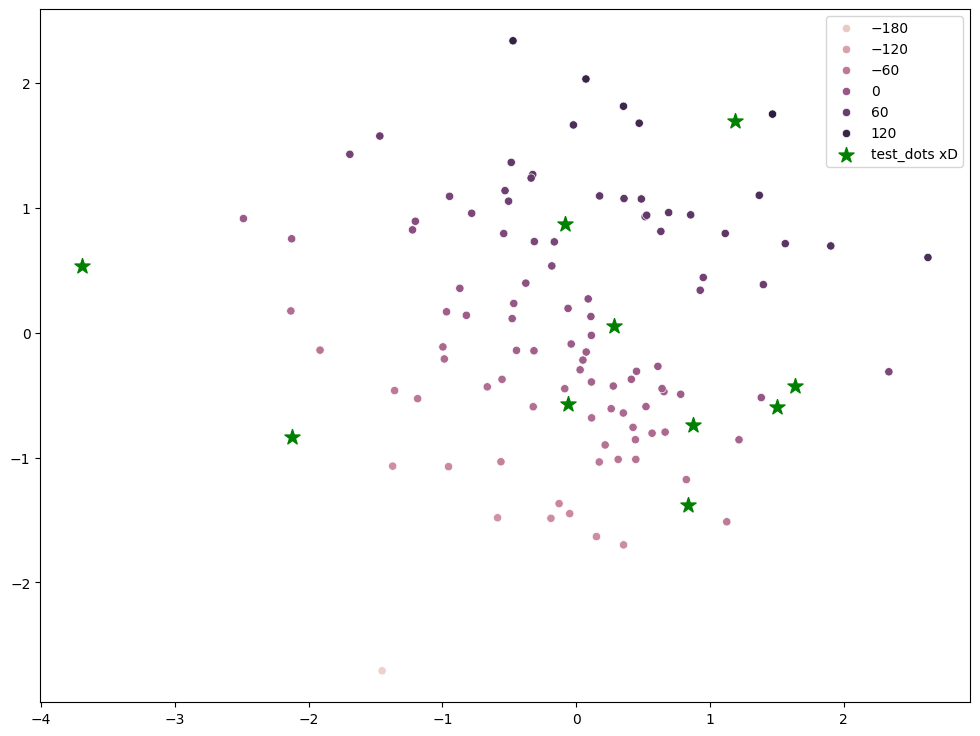

In [51]:
plt.figure(figsize= (12,9))
sns.scatterplot(x = X_train[ : ,0], y = X_train[ : ,1], hue = y_train)

plt.scatter(X_test[ :,0], X_test[ :,1], color = 'green', marker = '*', s= 130, label = 'test_dots xD')
plt.legend();

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
n_neighbors = 3

In [56]:
model = KNeighborsRegressor(n_neighbors = n_neighbors)

In [57]:
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
pred_test = model.predict(X_test)

In [59]:
pred_test, y_test

(array([-53.99812541, -25.33424853, -28.83554665, -10.18245823,
         47.79409516, 114.96770525, -16.82251686,   9.90350525,
          5.5775676 , -69.31157808]),
 array([-61.56318468, -23.01956535, -34.93897749,   0.28292736,
         49.5828809 , 127.67174326, -55.44024142,   9.81536928,
         13.26158326, -99.30796032]))

In [60]:
model.score(X_train, y_train)

0.9755410288255975